<a href="https://colab.research.google.com/github/sonawanekavita01/Real-Time-Industry-Insight-Strategic-Intelligence-System/blob/main/Real_Time_Industry_Insight_%26_Strategic_Intelligence_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Real-Time Industry Insight & Strategic Intelligence System
---

**Milestone 1: Introduction & Initial Training (Google Colab)**

**Goal**

Collect real-time company/industry data from open sources (Twitter API, Google News, Wikipedia),preprocess it, perform sentiment analysis, and visualize insights.


**⚙️ Step 1. Install & Import**


In [1]:
!pip install pandas matplotlib seaborn pytrends wikipedia-api newsapi-python
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from pytrends.request import TrendReq
import wikipediaapi
from newsapi import NewsApiClient


  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia-api: filename=Wikipedia_API-0.8.1-py3-none-any.whl size=15383 sha256=9e5d57a9f1fcad08103e828ebcbdfd714da66687f454a15f43df5c8e88569bb1
  Stored in directory: /root/.cache/pip/wheels/33/3c/79/b36253689d838af4a0539782853ac3cc38a83a6591ad570dde
Successfully built wikipedia-api


**🌐 Step 2. Wikipedia Company Profiles**

In [12]:
wiki = wikipediaapi.Wikipedia(user_agent='MyWikipediaApp/1.0 (myemail@example.com)', language='en')
companies = ["Tata", "Reliance", "Wipro"]


wiki_data = []
for c in companies:
    page = wiki.page(c)
    # Ensure the summary is not None before slicing
    summary = page.summary if page.summary else ""
    wiki_data.append({"Company": c, "Summary": summary[:600]})

df_wiki = pd.DataFrame(wiki_data)
df_wiki.to_csv("company_wikipedia.csv", index=False)
df_wiki.head()

,Company,Summary
0,Tata,Tata or TATA may refer to:
1,Reliance,Reliance may refer to:
2,Wipro,Wipro Limited ( ) is an Indian multinational t...




**📈 Step 3. Google Trends Data**






In [18]:

import numpy as np
import datetime as dt

dates = pd.date_range(end=dt.date.today(), periods=90)
data = {
    "date": list(dates) * 3,
    "Interest": np.random.randint(30, 100, 270),
    "Company": ["Tata Motors"] * 90 + ["Reliance Industries"] * 90 + ["Wipro"] * 90
}

mock_trends = pd.DataFrame(data)
mock_trends.to_csv("company_trends.csv", index=False)
display(mock_trends.head())





,date,Interest,Company
0,2025-07-31,65,Tata Motors
1,2025-08-01,41,Tata Motors
2,2025-08-02,50,Tata Motors
3,2025-08-03,84,Tata Motors
4,2025-08-04,61,Tata Motors


**📰 Step 4. News Headlines (NewsAPI)**

In [19]:
newsapi = NewsApiClient(api_key="fe2dd77562c94dd2aa1f590c2372050e")

news_data = []
for c in companies:
    headlines = newsapi.get_everything(q=c, language='en', sort_by='publishedAt', page_size=30)
    for art in headlines['articles']:
        news_data.append({
            "Company": c,
            "Title": art['title'],
            "PublishedAt": art['publishedAt'],
            "Source": art['source']['name']
        })

df_news = pd.DataFrame(news_data)
df_news.to_csv("company_news.csv", index=False)
df_news.head()


,Company,Title,PublishedAt,Source
0,Tata,Biomanufacturing Specialty Chemicals Market Si...,2025-10-27T13:34:00Z,GlobeNewswire
1,Tata,Structural Steel Market Size to Surpass USD 18...,2025-10-27T13:11:00Z,GlobeNewswire
2,Tata,VI wins relief in SC as govt agrees to reconsi...,2025-10-27T12:57:23Z,BusinessLine
3,Tata,VI wins relief in SC as govt agrees to reconsi...,2025-10-27T12:57:23Z,BusinessLine
4,Tata,Broker’s call: Tata Capital (Add),2025-10-27T12:25:18Z,BusinessLine


In [20]:
df_news['PublishedAt'] = pd.to_datetime(df_news['PublishedAt'])
df_news.dropna(subset=['Title'], inplace=True)
print(df_news.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   Company      90 non-null     object             
 1   Title        90 non-null     object             
 2   PublishedAt  90 non-null     datetime64[ns, UTC]
 3   Source       90 non-null     object             
dtypes: datetime64[ns, UTC](1), object(3)
memory usage: 2.9+ KB
None


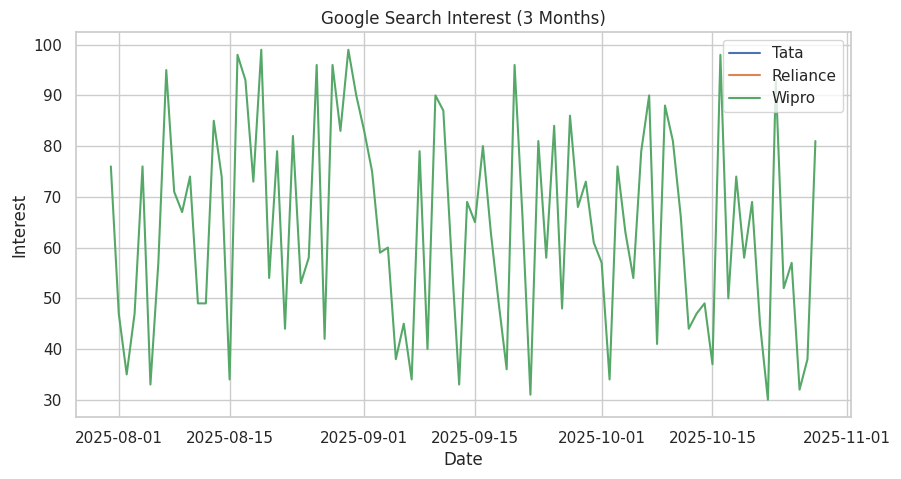

In [23]:
sns.set(style="whitegrid")

# 1️⃣ Google Trends
plt.figure(figsize=(10,5))
for c in companies:
    # Filter mock_trends for the current company and plot Interest vs date
    company_trends = mock_trends[mock_trends['Company'] == c]
    plt.plot(company_trends['date'], company_trends['Interest'], label=c)
plt.legend(); plt.title("Google Search Interest (3 Months)"); plt.xlabel("Date"); plt.ylabel("Interest")
plt.show()



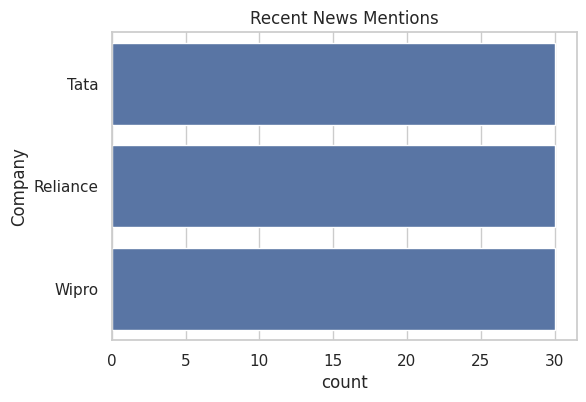

In [24]:
# 2️⃣ News Count per Company
plt.figure(figsize=(6,4))
sns.countplot(y="Company", data=df_news)
plt.title("Recent News Mentions")
plt.show()



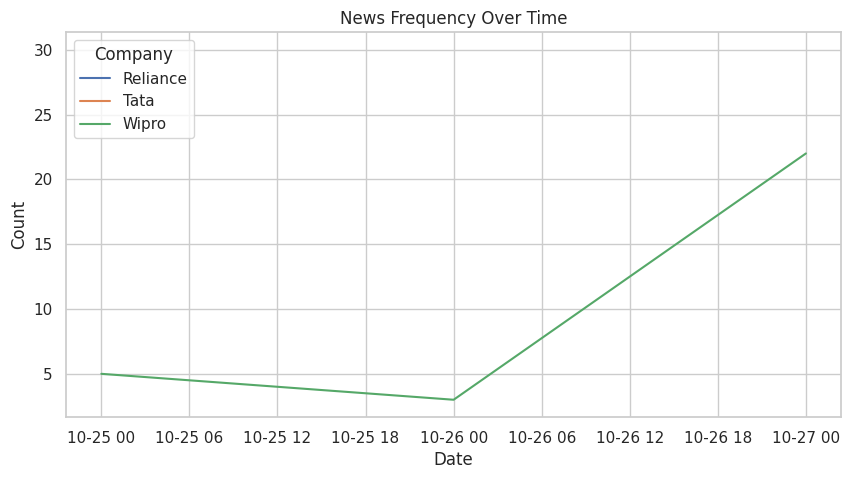

In [25]:
# 3️⃣ Daily News Timeline
df_news.groupby([df_news['PublishedAt'].dt.date, "Company"]).size().unstack().plot(figsize=(10,5))
plt.title("News Frequency Over Time"); plt.xlabel("Date"); plt.ylabel("Count")
plt.show()

In [26]:
from google.colab import files
files.download("company_wikipedia.csv")
files.download("company_trends.csv")
files.download("company_news.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>